<a href="https://colab.research.google.com/github/arumshin-dev/python_conda_jupyter/blob/main/codeit/250813_%EC%BD%94%EB%93%9C%EC%8B%A4%EC%8A%B54_5_%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84%EC%99%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글 설정 Task
Set up Korean language support in Google Colab, including installing necessary fonts and configuring Matplotlib for proper display of Korean characters in plots.

## Install korean fonts

### Subtask:
Install necessary Korean fonts in the Colab environment.


**Reasoning**:
Install the `nanum-gothic` font package and delete the font cache using `apt-get` and `rm`.



In [ ]:
!sudo apt-get install -y fonts-nanum > /dev/null
!sudo fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib

## Configure matplotlib

### Subtask:
Configure Matplotlib to use the installed Korean fonts to ensure proper display of Korean characters in plots.


**Reasoning**:
Configure Matplotlib to use the installed Korean fonts and handle Unicode characters.



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

## Reload matplotlib

### Subtask:
Reload Matplotlib to apply the changes.


**Reasoning**:
Reload Matplotlib to apply the font changes.



**Reasoning**:
The previous command failed because `matplotlib.reload_library()` does not exist. A common way to apply Matplotlib configuration changes is to restart the runtime or simply re-import `matplotlib.pyplot`. Since restarting the runtime is not an option here, re-importing `matplotlib.pyplot` is the best approach to ensure the configuration is loaded.



In [ ]:
import matplotlib.pyplot as plt

## Verify korean display

### Subtask:
Create a simple plot to verify that Korean characters are displayed correctly.


**Reasoning**:
Create a simple plot with Korean characters in the title and labels to verify the font configuration.



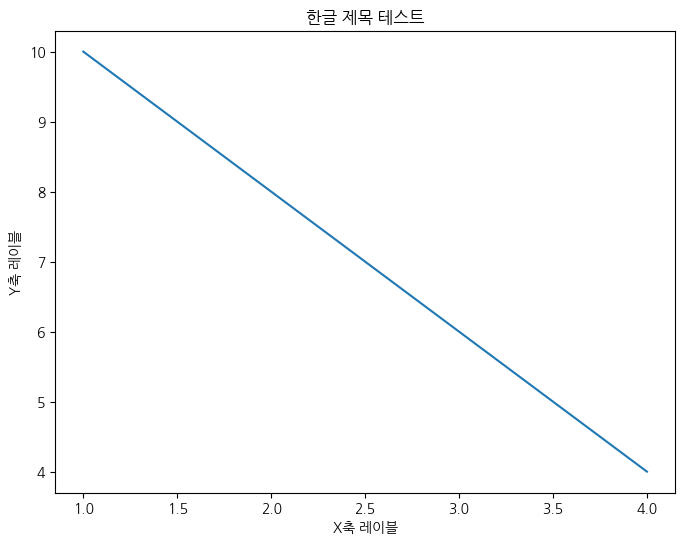

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot([1, 2, 3, 4], [10, 8, 6, 4])
plt.title('한글 제목 테스트')
plt.xlabel('X축 레이블')
plt.ylabel('Y축 레이블')
plt.show()

**Reasoning**:
The previous attempt to plot Korean characters failed because the font was not found. I need to check the available fonts and select one that includes Korean characters.



In [ ]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
korean_fonts = [f for f in font_list if 'Nanum' in f or 'Noto Sans CJK' in f]
print("Available Korean fonts:")
for font in korean_fonts:
    print(font)

Available Korean fonts:
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf
/usr/share/fonts/truetype/nanum/NanumGothic.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf


**Reasoning**:
Based on the available fonts, 'NanumGothic' is present. I will reconfigure matplotlib to explicitly use this font file path and then attempt to plot again.



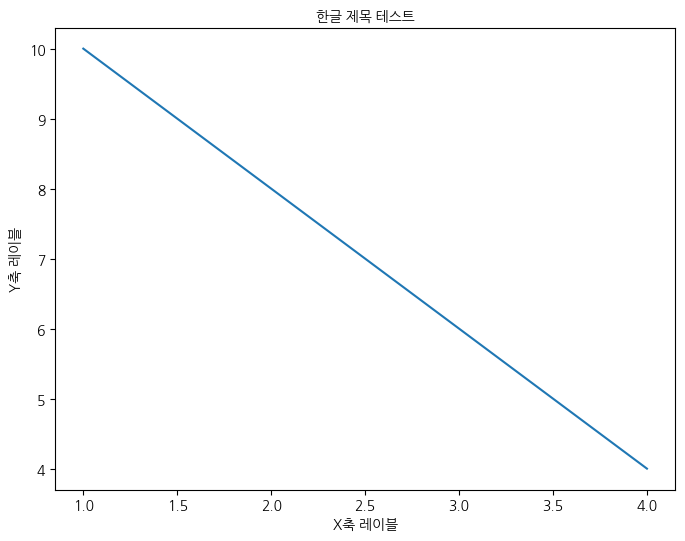

In [ ]:
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(8, 6))
plt.plot([1, 2, 3, 4], [10, 8, 6, 4])
plt.title('한글 제목 테스트', fontproperties=fontprop)
plt.xlabel('X축 레이블', fontproperties=fontprop)
plt.ylabel('Y축 레이블', fontproperties=fontprop)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The installation of the `fonts-nanum` package and rebuilding the font cache were successful, making Korean fonts available in the Colab environment.
*   Matplotlib was configured to use the 'NanumGothic' font family and handle Unicode minus signs, although this initial configuration alone did not fully resolve display issues for all text elements.
*   Explicitly specifying the font file path for text elements in the plot using `matplotlib.font_manager.FontProperties` was necessary to ensure correct rendering of Korean characters.
*   Several Korean fonts, including 'NanumGothic.ttf', were confirmed to be available in the system after installation.

### Insights or Next Steps

*   While setting the global font family with `plt.rc()` is a good starting point, for consistent Korean character display across all plot elements, it's more robust to explicitly specify the font using `FontProperties` or ensure the global font setting is correctly applied to all text objects by Matplotlib's backend.
*   Consider testing other available Korean fonts like 'Noto Sans CJK' to see if they offer better compatibility or visual appearance in Matplotlib plots.


# 한글1

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,842 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126284 files and dire

# 박스 플롯 - 이상치 확인

In [ ]:
import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

x = [5, 7, 8, 9, 10, 12, 13, 14, 20]
q1 = np.percentile(x, 25)
q2 = np.percentile(x, 50)
q3 = np.percentile(x, 75)
iqr = q3 - q1
# print(q1, q3, iqr)
print("Q1: ", q1)
print("Q2(중앙값): ", q2)
print("Q3: ", q3)
print("IQR: ", iqr)

Q1:  8.0
Q2(중앙값):  10.0
Q3:  13.0
IQR:  5.0


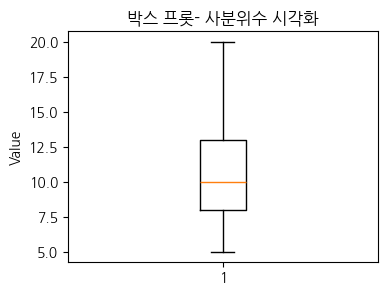

In [ ]:
# 박스 프롯 - 이상치 확인
plt.figure(figsize=(4,3))
plt.boxplot(x)
plt.ylabel("Value")
plt.title("박스 프롯- 사분위수 시각화")
plt.show()

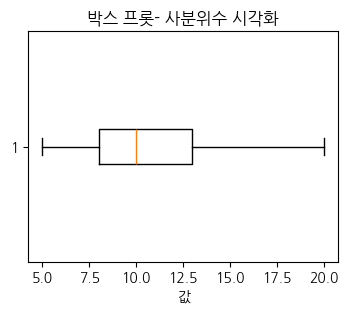

In [ ]:
plt.figure(figsize=(4,3))
plt.boxplot(x, vert=False)
plt.xlabel("값")
plt.title("박스 프롯- 사분위수 시각화")
plt.show()

In [ ]:
x = [-100, 5, 7, 8, 9, 10, 12, 13, 14, 20, 79]
q1 = np.percentile(x, 25)
q2 = np.percentile(x, 50)
q3 = np.percentile(x, 75)
iqr = q3 - q1
# print(q1, q3, iqr)
print("Q1: ", q1)
print("Q2(중앙값): ", q2)
print("Q3: ", q3)
print("IQR: ", iqr)

Q1:  7.5
Q2(중앙값):  10.0
Q3:  13.5
IQR:  6.0


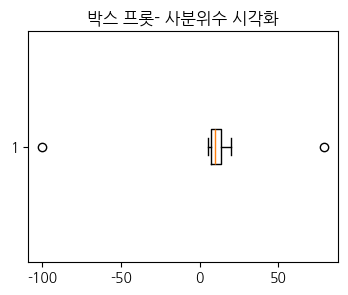

In [ ]:
plt.figure(figsize=(4,3))
plt.boxplot(x, vert=False)
plt.title("박스 프롯- 사분위수 시각화")
plt.show()

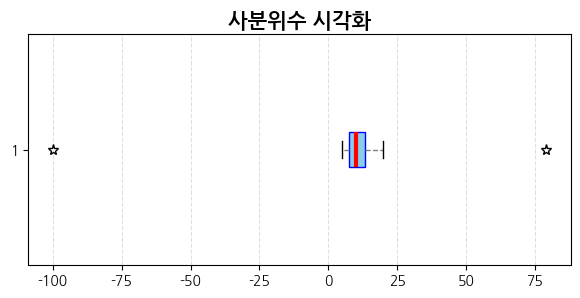

In [ ]:
# 커스터마이징
plt.figure(figsize=(7,3))
plt.boxplot(
            x,
            vert=False,
            patch_artist=True,                                        # 박스 색을 채워라
            boxprops=dict(facecolor = 'skyblue', color = 'blue'),     # 박스 스타일
            medianprops=dict(color = 'red', linewidth = 3),           # 중앙값 선 스타일
            whiskerprops=dict(color = 'gray', linestyle = '--'),      # 수염 스타일
            flierprops=dict(marker='*', markersize=8)                 # 이상치 스타일
            )
plt.title("사분위수 시각화", fontsize=15, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()

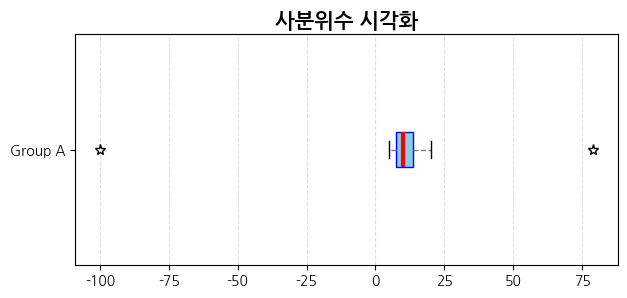

In [ ]:
# 박스 프롯 - 커스터마이징 (2)

box_style=dict(facecolor = 'skyblue', color = 'blue')     # 박스 스타일
median_style=dict(color = 'red', linewidth = 3)           # 중앙값 선 스타일
whisker_style=dict(color = 'gray', linestyle = '--')      # 수염 스타일
flier_style=dict(marker='*', markersize=8)                # 이상치 스타일

plt.figure(figsize=(7,3))
plt.boxplot(
    x,
    vert = False,
    patch_artist=True,                                        # 박스 색을 채워라
    boxprops=box_style,
    medianprops=median_style,
    whiskerprops=whisker_style,
    flierprops=flier_style
    )
plt.title("사분위수 시각화", fontsize=15, fontweight='bold')
plt.grid(axis = 'x', linestyle = '--', alpha=0.4)
plt.yticks([1], ['Group A'])
plt.show()

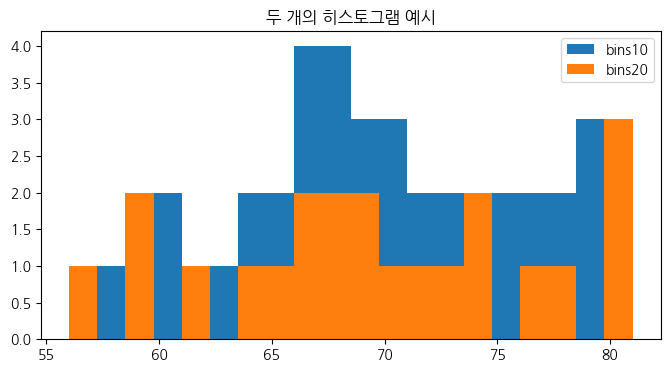

In [ ]:
# 시각화: 히스토그램 실습
weight = [68, 81, 64, 56, 78, 74, 61, 77, 66, 68, 59, 71,
          80, 59, 67, 81, 69, 73, 69, 74, 70, 65]

plt.figure(figsize=(8,4))
plt.hist(weight, label='bins10')
plt.hist(weight, bins=20, label='bins20')
plt.legend()
plt.title("두 개의 히스토그램 예시")
plt.show()

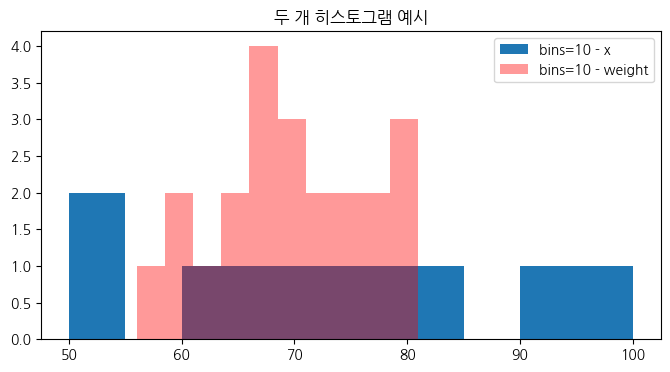

In [ ]:
# 히스토그램 실습 (2)

weight = [68, 81, 64, 56, 78, 74, 61, 77, 66, 68, 59, 71,
          80, 59, 67, 81, 69, 73, 69, 74, 70, 65]
x = [50, 66, 60, 53, 70, 76, 80, 90, 100]

plt.figure(figsize=(8,4))

plt.hist(x, label='bins=10 - x')
plt.hist(weight, label='bins=10 - weight', color='red', alpha=.4)

plt.legend()
plt.title("두 개 히스토그램 예시")
plt.show()

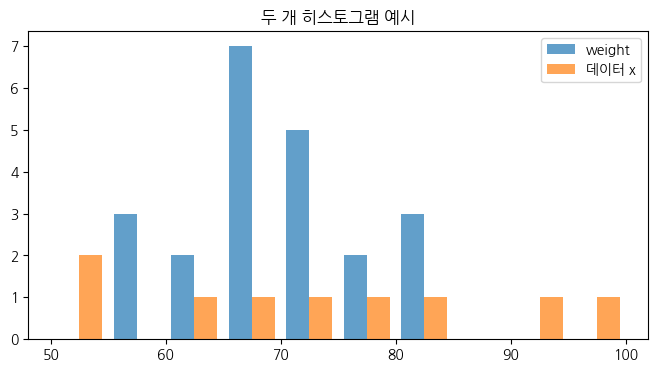

In [ ]:
# 히스토그램 실습 (3)

weight = [68, 81, 64, 56, 78, 74, 61, 77, 66, 68, 59, 71,
          80, 59, 67, 81, 69, 73, 69, 74, 70, 65]
x = [50, 66, 60, 53, 70, 76, 80, 90, 100]

plt.figure(figsize=(8,4))

plt.hist([weight,x], label=['weight','데이터 x'], alpha=.7)

plt.legend()
plt.title("두 개 히스토그램 예시")
plt.show()

<Axes: ylabel='Density'>

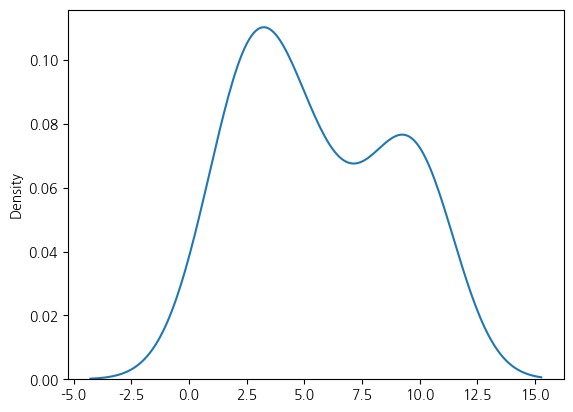

In [ ]:
# KDE plot
import seaborn as sns

# sns.kdeplot(weight)

x = [1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 7, 8, 9, 10, 10, 10, 10, 10]
sns.kdeplot(x)

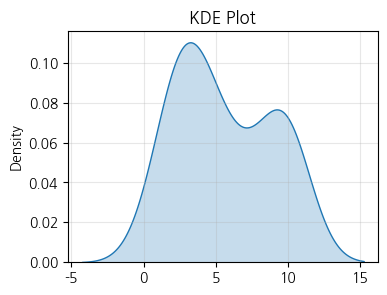

In [ ]:
# KDE plot
import seaborn as sns

x = [1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 7, 8, 9, 10, 10, 10, 10, 10]

plt.figure(figsize=(4,3))
sns.kdeplot(x, fill=True)
plt.title("KDE Plot")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# 드라이브 마운트 코드
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/코드잇_1/Data/body.csv')
df

,height,weight
0,188.3,85.8
1,176.2,78.0
2,175.9,75.6
3,181.1,85.1
4,182.6,82.3
...,...,...
495,172.0,70.0
496,169.6,83.0
497,163.3,68.6
498,185.7,95.6


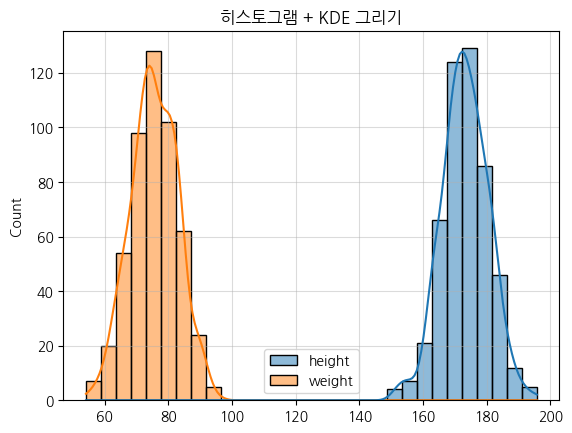

In [ ]:
#히스토그램 + KDE 그리기
import seaborn as sns

sns.histplot(df, kde=True, bins=30, edgecolor='black')
plt.title('히스토그램 + KDE 그리기')
plt.grid(True, alpha=0.45)
plt.show()

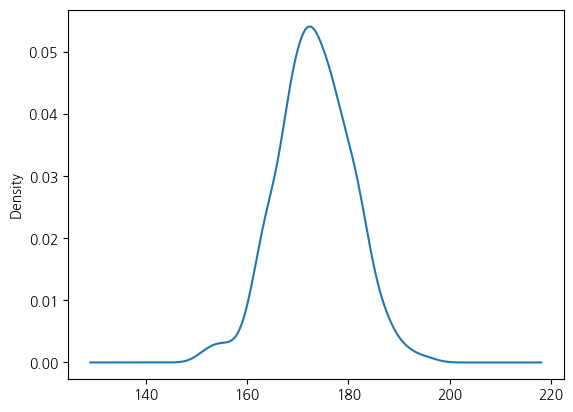

In [ ]:
df['height'].plot(kind='kde')
plt.show()

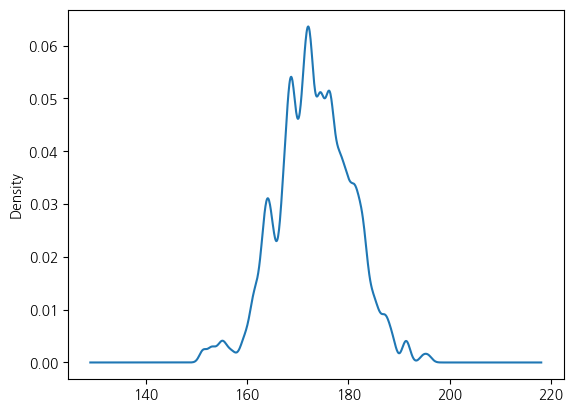

In [ ]:
df['height'].plot(kind='kde', bw_method=0.1)
#bw_method ? 기본값=1??, 작을수록 찌글찌글>클수록 둥근 : 대역폭
plt.show()

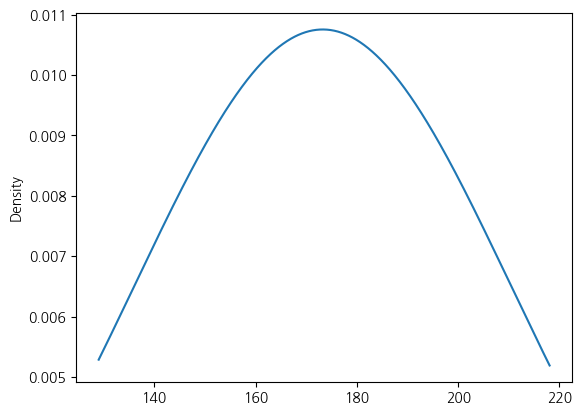

In [ ]:
df['height'].plot(kind='kde', bw_method=5)
plt.show()

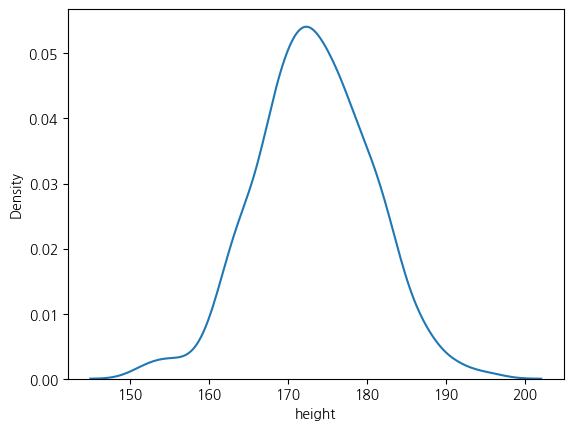

In [ ]:
sns.kdeplot(df['height'])
plt.show()

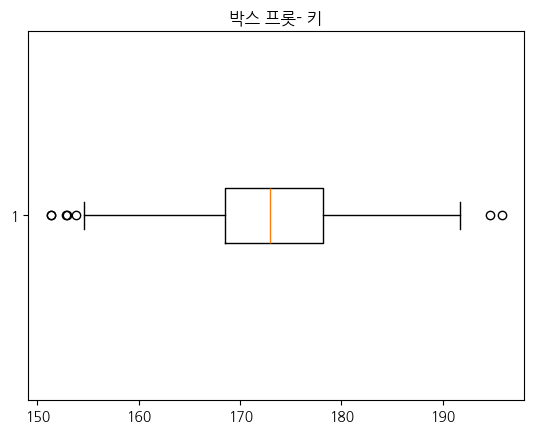

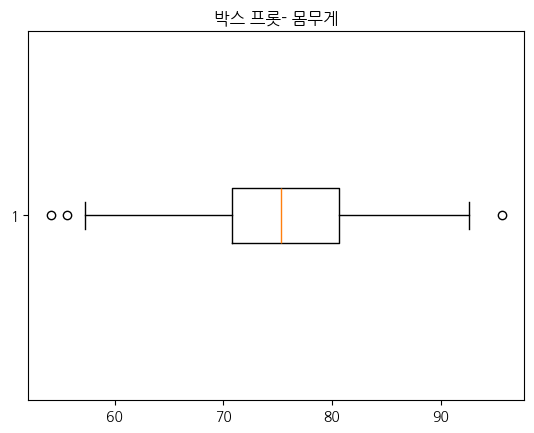

In [ ]:
plt.boxplot(df['height'], vert=False)
plt.title("박스 프롯- 키")
plt.show()
plt.boxplot(df['weight'], vert=False)
plt.title("박스 프롯- 몸무게")
plt.show()

Q1: 168.5
Q2 (중앙값): 172.95
Q3: 178.225
IQR: 9.724999999999994


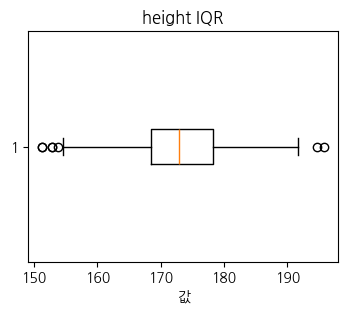

In [ ]:
## 실습1 - 키와 몸무게 이상치 박스플롯 그리기
import numpy as np

# 모범답안 기본 - height
q1 = np.percentile(df['height'], 25)
q2 = np.percentile(df['height'], 50)
q3 = np.percentile(df['height'], 75)
iqr = q3 - q1

print("Q1:", q1)
print("Q2 (중앙값):", q2)
print("Q3:", q3)
print("IQR:", iqr)

plt.figure(figsize=(4,3))
plt.boxplot(df['height'], vert=False)
plt.title("height IQR")
plt.xlabel("값")
plt.show()

Q1: 70.775
Q2 (중앙값): 75.3
Q3: 80.64999999999999
IQR: 9.874999999999986


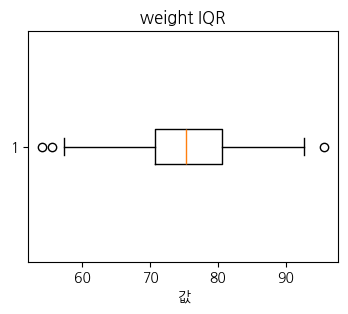

In [ ]:
# 모범답안 기본 - weight
q1 = np.percentile(df['weight'], 25)
q2 = np.percentile(df['weight'], 50)
q3 = np.percentile(df['weight'], 75)
iqr = q3 - q1

print("Q1:", q1)
print("Q2 (중앙값):", q2)
print("Q3:", q3)
print("IQR:", iqr)

plt.figure(figsize=(4,3))
plt.boxplot(df['weight'], vert=False)
plt.title("weight IQR")
plt.xlabel("값")
plt.show()

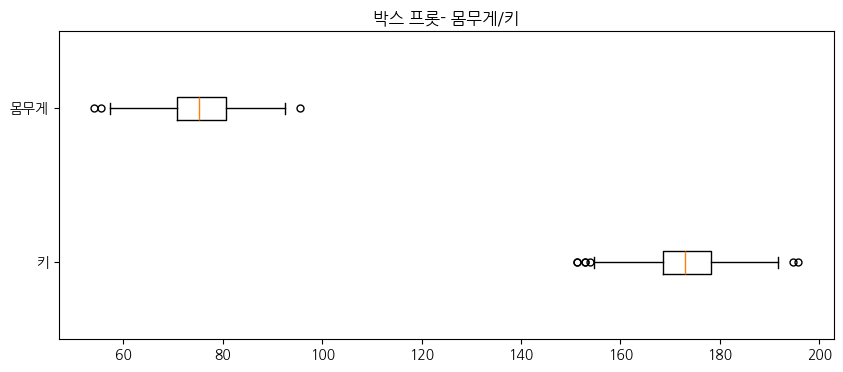

In [ ]:
import numpy as np

# 이상치들이 겹쳐 보여서 좀더 늘리는 방법은?
plt.figure(figsize=(10, 4)) # 플롯 크기를 좀 더 크게 설정
plt.boxplot(df, vert=False, flierprops=dict(marker='o', markersize=5, zorder=5)) # zorder를 높여 이상치가 다른 요소 위에 그려지도록 함
plt.title("박스 프롯- 몸무게/키")
plt.yticks([1, 2], ['키','몸무게']) # y축 레이블 수정
plt.show()

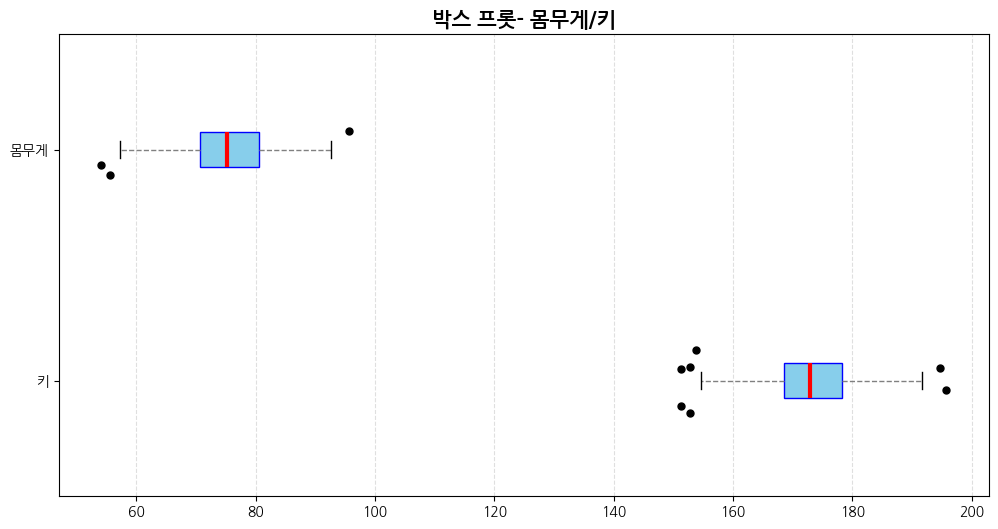

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 이상치들이 겹쳐 보여서 좀더 늘리는 방법은?
plt.figure(figsize=(12, 6)) # 플롯 크기를 좀 더 크게 설정

# 박스플롯 데이터 얻기 (이상치 포함)
box_data = plt.boxplot(df.values, vert=False, patch_artist=True,
                        boxprops=dict(facecolor = 'skyblue', color = 'blue'),     # 박스 스타일
                        medianprops=dict(color = 'red', linewidth = 3),           # 중앙값 선 스타일
                        whiskerprops=dict(color = 'gray', linestyle = '--'),      # 수염 스타일
                        flierprops=dict(marker='o', markersize=5, zorder=5)) # 이상치 스타일

# 이상치 데이터 추출 및 jitter 적용하여 다시 플롯
for i, flier in enumerate(box_data['fliers']):
    y_data = flier.get_ydata()
    x_data = flier.get_xdata()
    # Add jitter to y-data
    y_jitter = y_data + np.random.uniform(-0.15, 0.15, size=len(y_data))
    plt.plot(x_data, y_jitter, 'o', color=flier.get_markeredgecolor(), markersize=flier.get_markersize(), zorder=flier.get_zorder())

# 기존 fliers는 숨김 (이미 jittered outliers를 다시 그렸으므로)
for flier in box_data['fliers']:
    flier.set_visible(False)


plt.title("박스 프롯- 몸무게/키", fontsize=15, fontweight='bold')
plt.yticks([1, 2], ['키','몸무게']) # y축 레이블 수정
plt.grid(axis = 'x', linestyle = '--', alpha=0.4)
plt.show()

# Seaborn 실습

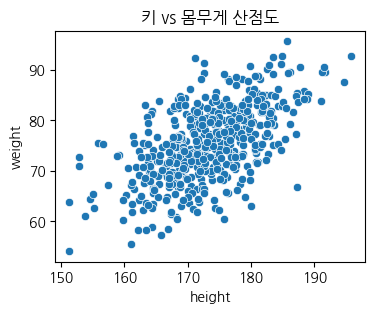

In [ ]:
#산점도
plt.figure(figsize=(4,3))
sns.scatterplot(x='height', y='weight', data=df)
plt.title("키 vs 몸무게 산점도")
plt.show()

In [ ]:
df.describe() #최소값, 최대값, 기본적인 산술통계 확인

,height,weight
count,500.00000,500.000000
mean,173.26280,75.542600
std,7.27484,7.303482
min,151.30000,54.100000
25%,168.50000,70.775000
50%,172.95000,75.300000
75%,178.22500,80.650000
max,195.80000,95.600000


In [ ]:
# 히스토그램 - 구간 나누기
df['height_bin']=pd.cut(df['height'], bins=range(150,200,5))
df['weight_bin']=pd.cut(df['weight'], bins=list(range(30,100,10)) + [100])

df
#() [] :(x,y] x 초과 y 이하

,height,weight,height_bin,weight_bin
0,188.3,85.8,"(185, 190]","(80, 90]"
1,176.2,78.0,"(175, 180]","(70, 80]"
2,175.9,75.6,"(175, 180]","(70, 80]"
3,181.1,85.1,"(180, 185]","(80, 90]"
4,182.6,82.3,"(180, 185]","(80, 90]"
...,...,...,...,...
495,172.0,70.0,"(170, 175]","(60, 70]"
496,169.6,83.0,"(165, 170]","(80, 90]"
497,163.3,68.6,"(160, 165]","(60, 70]"
498,185.7,95.6,"(185, 190]","(90, 100]"


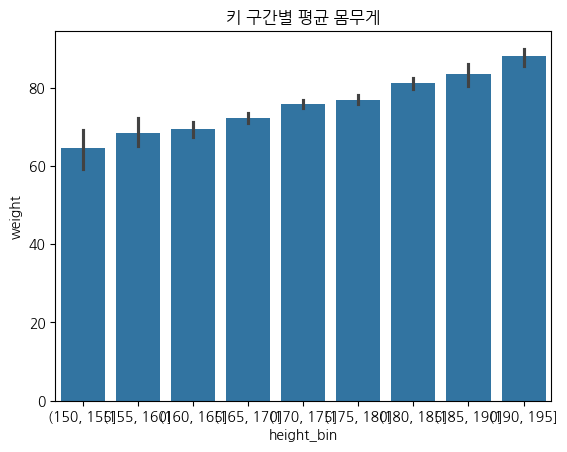

In [ ]:
#barplot

sns.barplot(x='height_bin', y='weight', data=df, estimator=np.mean)
plt.title("키 구간별 평균 몸무게")
plt.show()

In [ ]:
print("몸무게 최대값:", df['weight'].max())
print("몸무게 구간:", range(30, 100, 10))
print(range(30, 100, 10))

몸무게 최대값: 95.6
몸무게 구간: range(30, 100, 10)
range(30, 100, 10)


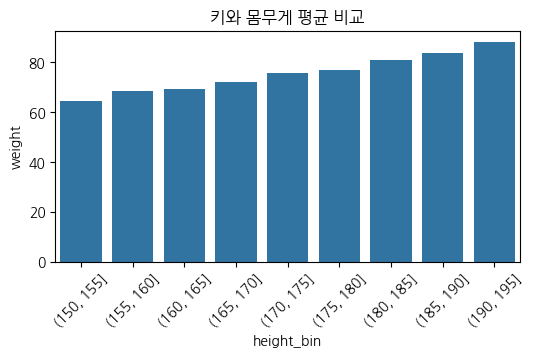

In [ ]:
# barplot

plt.figure(figsize=(6,3))
sns.barplot(data=df, x='height_bin', y='weight', errorbar=None)
plt.title("키와 몸무게 평균 비교")
plt.xticks(rotation=45)
plt.show()

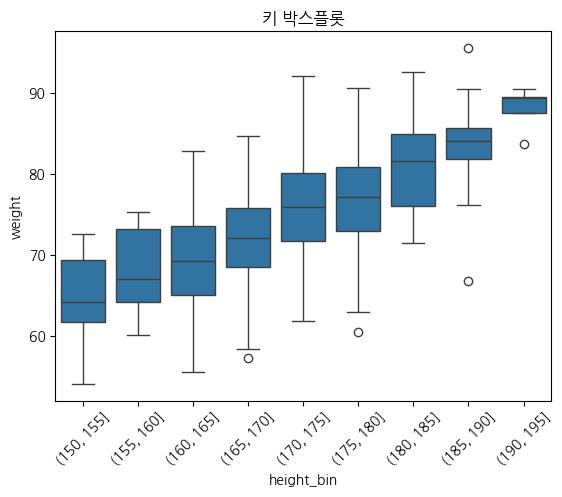

In [ ]:
# 박스 플롯 - 구간별로
# plt.figure(figsize=(6,3))
sns.boxplot(data=df, x='height_bin', y='weight')
plt.title('키 박스플롯')
plt.xticks(rotation=45)
plt.show()

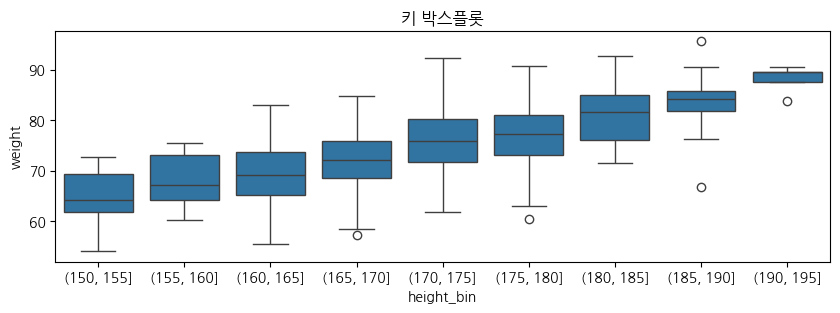

In [ ]:
# 박스 플롯 - 구간별로
plt.figure(figsize=(10,3))
sns.boxplot(data=df, x='height_bin', y='weight')
plt.title('키 박스플롯')
# plt.xticks(rotation=45)
plt.show()

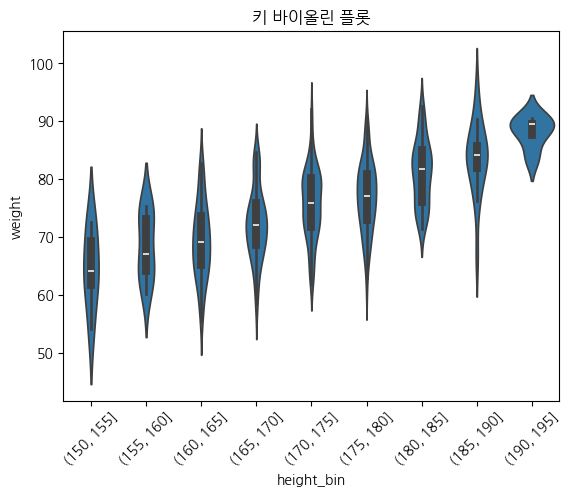

In [ ]:
# 바이올린 플롯: 박스플롯 + 데이터 밀도 결합 시각화
# plt.figure(figsize=(6,3))
sns.violinplot(data=df, x='height_bin', y='weight')
plt.title("키 바이올린 플롯")
plt.xticks(rotation=45)
plt.show()

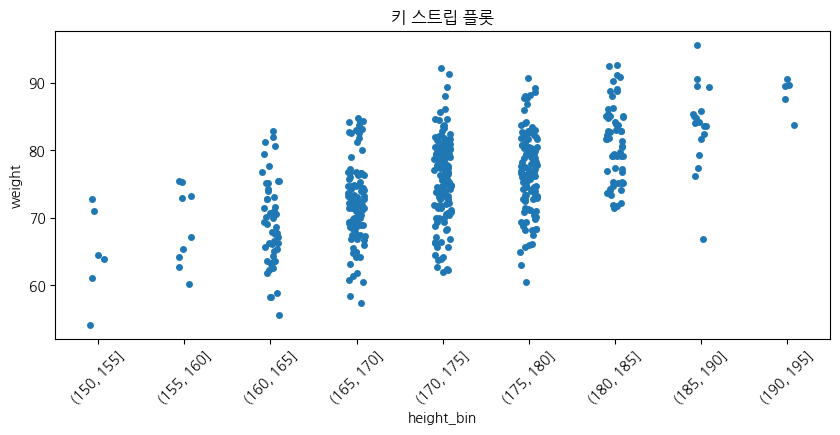

In [ ]:
# 스트립플롯

plt.figure(figsize=(10,4))
sns.stripplot(data=df, x='height_bin', y='weight')
plt.title('키 스트립 플롯')
plt.xticks(rotation=45)
plt.show()

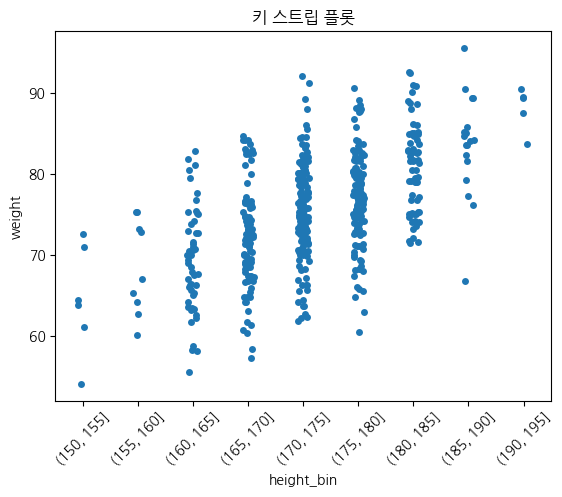

In [ ]:
# plt.figure(figsize=(10,4))
sns.stripplot(data=df, x='height_bin', y='weight', jitter=True)
plt.title('키 스트립 플롯')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


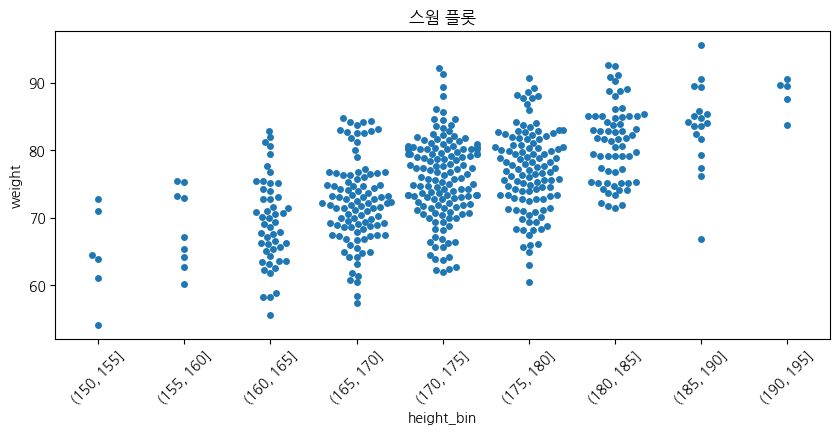

In [ ]:
#스웜 플롯
plt.figure(figsize=(10,4))
sns.swarmplot(data=df, x='height_bin', y='weight')
plt.title('스웜 플롯')
plt.xticks(rotation=45)
plt.show()

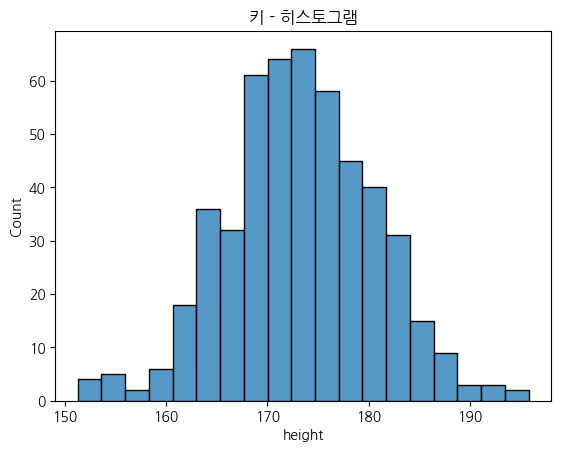

In [ ]:
sns.histplot(data=df, x='height')
plt.title('키 - 히스토그램')
plt.show()
#

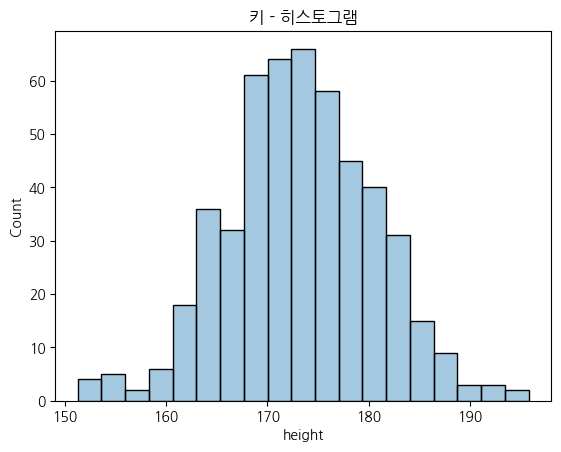

In [ ]:
sns.histplot(data=df, x='height',alpha=.4)
plt.title('키 - 히스토그램')
plt.show()

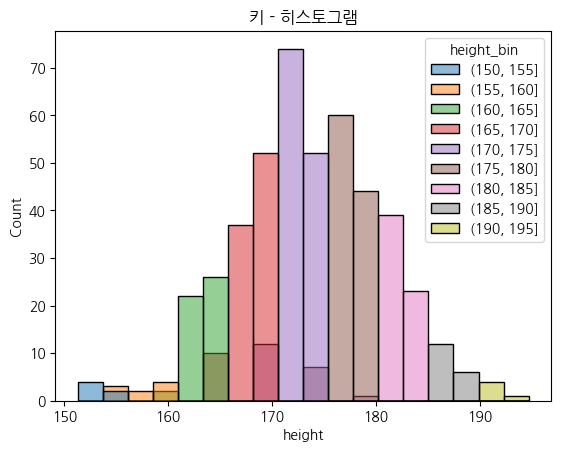

In [ ]:
sns.histplot(data=df, x='height', hue='height_bin')
plt.title('키 - 히스토그램')
plt.show()

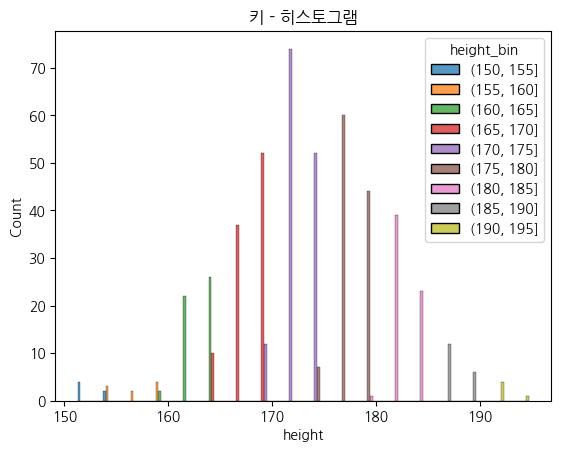

In [ ]:
sns.histplot(data=df, x='height', hue='height_bin', multiple='dodge')
# hue='height_bin'는 단순히 색상만 다르게 하는 것을 넘어, 데이터를 'height_bin' 열의 값에 따라 그룹화하는 역할을 합니다.
# seaborn의 많은 플롯 함수에서 hue 파라미터는 데이터를 지정된 열의 고유 값별로 나누어 시각화합니다. histplot의 경우, hue='height_bin'를 사용하면 'height' 데이터가 각 'height_bin' 구간별로 분리되어 각각의 히스토그램이 그려지게 됩니다.
# 그리고 multiple='dodge' 설정 덕분에 각 구간별 히스토그램의 막대들이 서로 겹치지 않고 나란히 표시되어, 각 키 구간별 'height' 분포(예: 해당 구간에 속하는 데이터 포인트의 개수)를 시각적으로 비교할 수 있게 됩니다.
# 따라서 hue는 색상 구분을 통해 시각적인 구분을 제공하지만, 그 이면에는 데이터 그룹화 및 각 그룹별 분포 시각화라는 더 큰 역할이 있습니다.
plt.title('키 - 히스토그램')
plt.show()

<Figure size 1000x400 with 0 Axes>

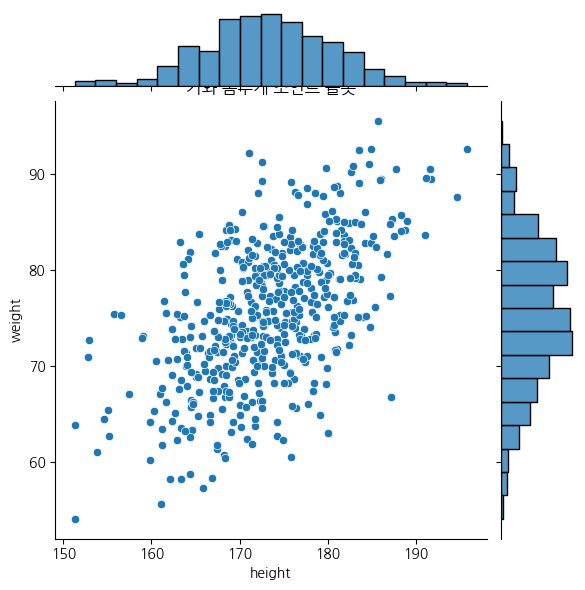

In [ ]:
#조인트 플롯
plt.figure(figsize=(10,4))
sns.jointplot(data=df, x='height', y='weight')
plt.title('키와 몸무게 조인트 플롯')
plt.show()
#

<Figure size 400x100 with 0 Axes>

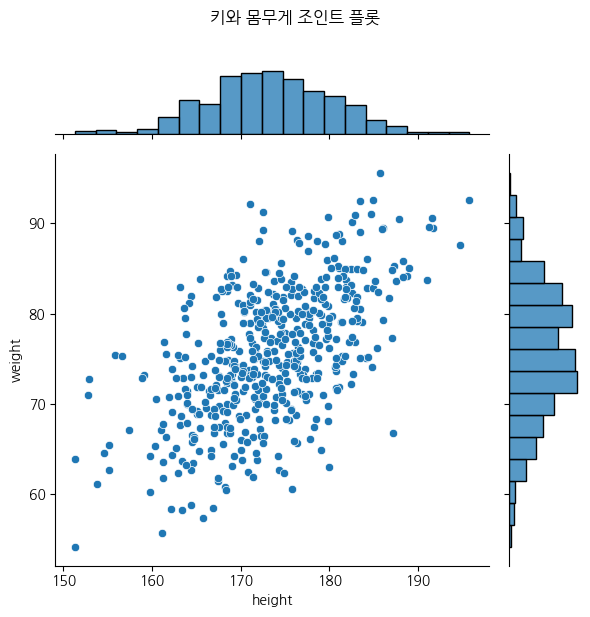

In [ ]:
#조인트 플롯
plt.figure(figsize=(4,1))
# seaborn.jointplot는 여러 개의 축을 가진 복합적인 그림을 생성하기 때문에 plt.title()을 사용하면 제목이 겹칠 수 있습니다.
g = sns.jointplot(data=df, x='height', y='weight', kind='scatter')
g.fig.suptitle('키와 몸무게 조인트 플롯', y=1.02) # y를 조정하여 제목 위치 조정
g.fig.tight_layout() # 레이아웃 조정
plt.show()

<Figure size 400x100 with 0 Axes>

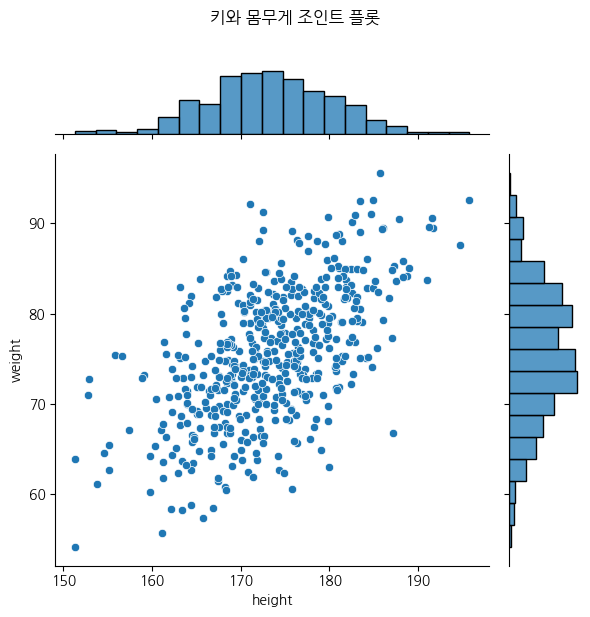

In [ ]:
#조인트 플롯
plt.figure(figsize=(4,1))
# seaborn.jointplot는 여러 개의 축을 가진 복합적인 그림을 생성하기 때문에 plt.title()을 사용하면 제목이 겹칠 수 있습니다.
g = sns.jointplot(data=df, x='height', y='weight', kind='scatter')
g.fig.suptitle('키와 몸무게 조인트 플롯', y=1.02) # y를 조정하여 제목 위치 조정
g.fig.tight_layout() # 레이아웃 조정
plt.show()

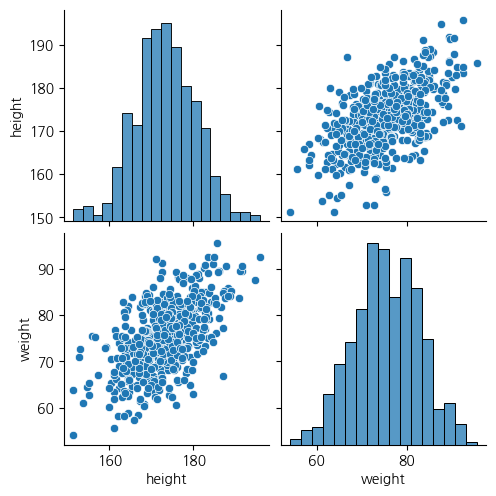

In [ ]:
# pairplot

sns.pairplot(df)
plt.show()

In [ ]:
# 씨본 데이터 목록 - 명령문 기억할 필요 없음
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
titanic_data = sns.load_dataset('titanic')
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 씨본 스타일

팔레트

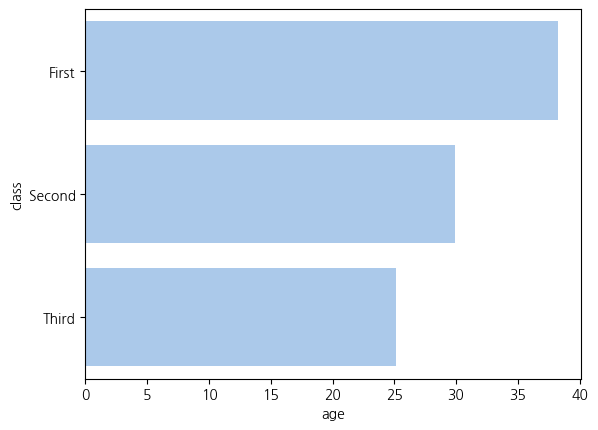

In [ ]:
sns.set_palette(sns.color_palette("pastel"))
sns.barplot(data=titanic_data, x='age', y='class', errorbar=None)
plt.show()

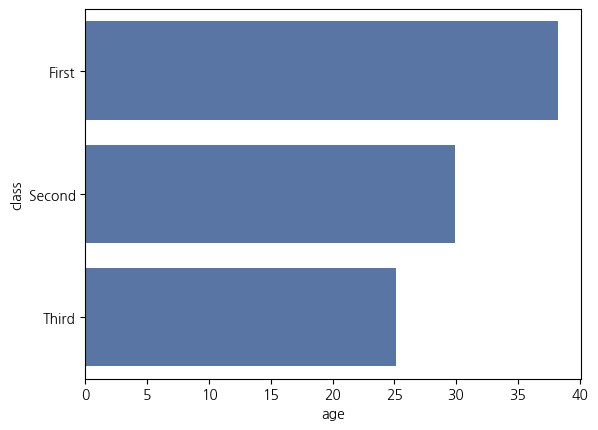

In [ ]:
sns.set_palette(sns.color_palette("deep"))
# 순차 팔레트 (Sequential palettes): 데이터의 순서나 양에 따라 색상이 점진적으로 변합니다. 주로 단일 변수의 변화를 나타낼 때 사용됩니다. 예: 'Blues', 'Greens', 'Reds', 'viridis', 'plasma'
# 발산 팔레트 (Diverging palettes): 중간 값에서 양 극단으로 갈수록 색상이 변화합니다. 데이터의 양극단 차이를 나타낼 때 유용합니다. 예: 'RdBu', 'PuOr', 'coolwarm'
# 정성 팔레트 (Qualitative palettes): 범주형 데이터처럼 순서가 없는 데이터를 구분할 때 사용됩니다. 각 범주를 명확히 구분할 수 있는 색상들로 구성됩니다. 예: 'tab10', 'tab20', 'Set1', 'Set2', 'Paired', 'pastel', 'deep', 'muted', 'bright', 'dark'
sns.barplot(data=titanic_data, x='age', y='class', errorbar=None)
plt.show()

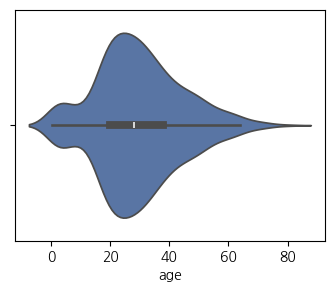

In [ ]:
plt.figure(figsize=(4,3))
sns.set_palette('deep') # pastel, deep, muted....
sns.violinplot(data=titanic_data, x='age')
plt.show()

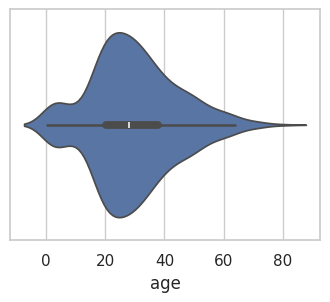

In [ ]:
#set_theme
plt.figure(figsize=(4,3))
sns.set_palette('deep') # pastel, deep, muted....
sns.set_theme(style='whitegrid')
sns.violinplot(data=titanic_data, x='age')
plt.show()

## 상관관계

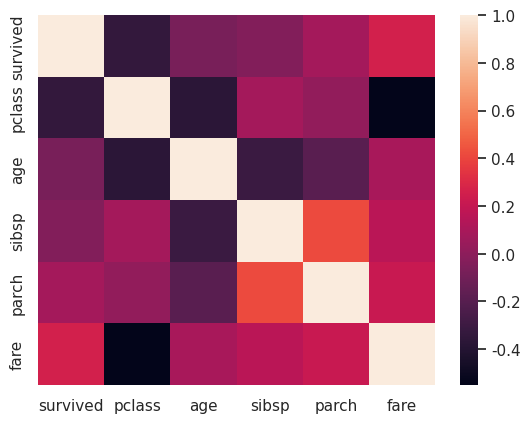

In [ ]:
corr = titanic_data.select_dtypes(include="number").corr()

# plt.figure(figsize=(5,4))
sns.heatmap(data=corr)
plt.show()

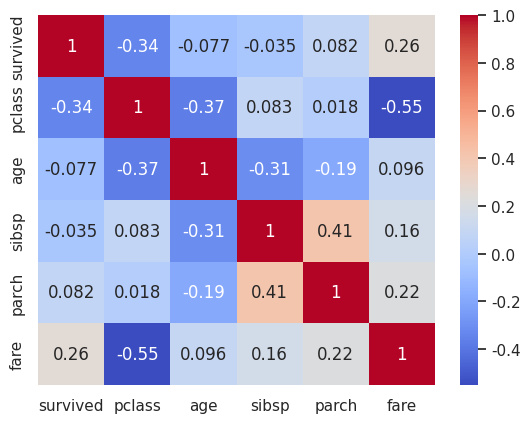

In [ ]:
sns.heatmap(corr, cmap='coolwarm', annot=True)
# 클래스가 높으면 안죽음? 요금이 높을수록 산다?
#클래스가 높아질수록 요금은 ?
plt.show()

In [ ]:
titanic_data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


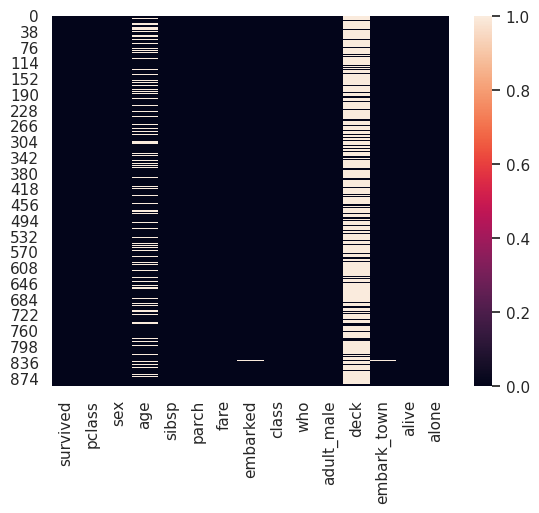

In [ ]:
#결측치를 히트맵으로 시각화

sns.heatmap(titanic_data.isnull())
# sns.heatmap(titanic_data.isnull(), cmap='viridis')
plt.show()

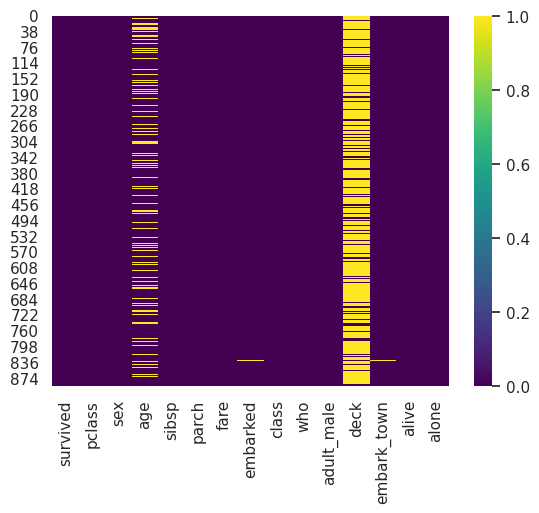

In [ ]:
sns.heatmap(titanic_data.isnull(), cmap='viridis')
plt.show()

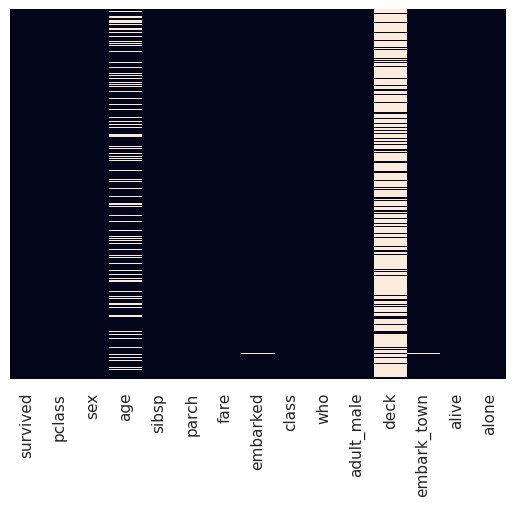

In [ ]:
sns.heatmap(titanic_data.isnull(), cbar=False, yticklabels=False)
plt.show()